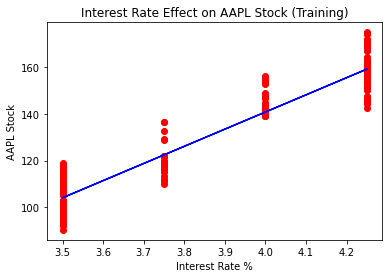

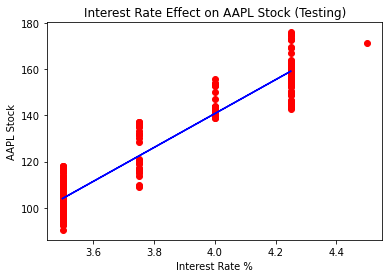

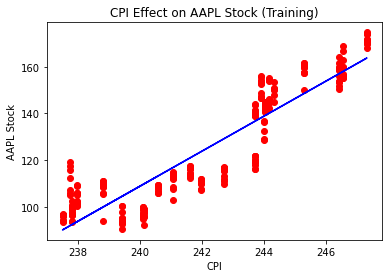

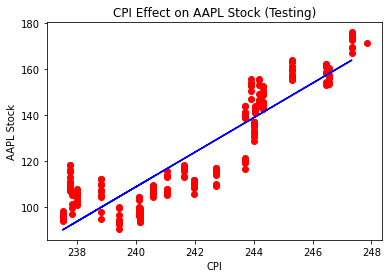

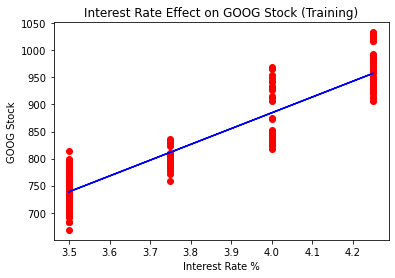

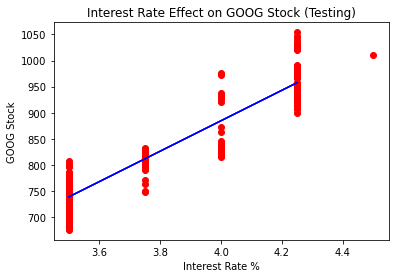

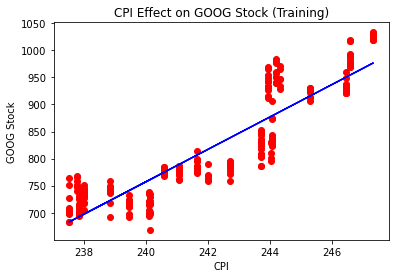

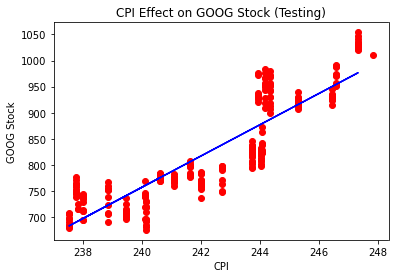

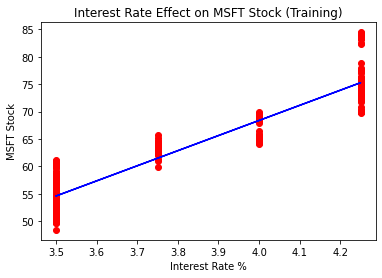

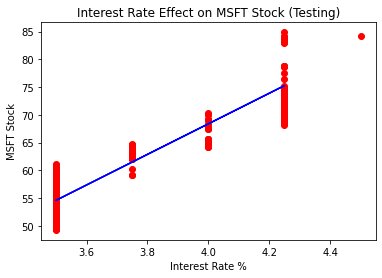

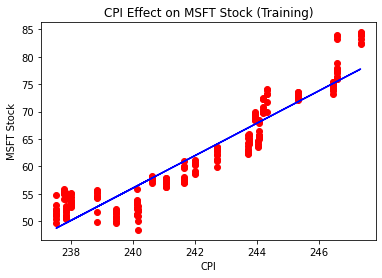

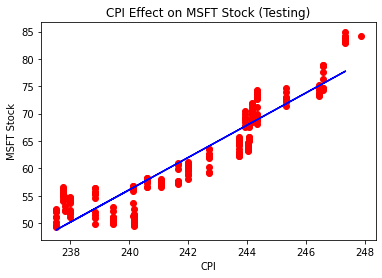

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sqlalchemy as sal
from sqlalchemy import create_engine

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-5FUOVAJ\SQLEXPRESSEX;'
                      'Database=DAT490;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

dataset = pd.read_sql_query('SELECT * FROM bi.StartUpAnalysis',conn)
#print(dataset)
XPrime = dataset['PRIME']#.values #get a copy of dataset exclude last column
XPrime = np.array(XPrime)
XPrime = XPrime.reshape(-1,1)
XCPI = dataset['CPIAUCSL']#.values
XCPI = np.array(XCPI)
XCPI = XCPI.reshape(-1,1)

yAAPL = dataset['AAPL']#.values #get array of dataset in column 1st
yAAPL = np.array(yAAPL)
yAAPL = yAAPL.reshape(-1,1)
yGOOG = dataset['GOOG']#.values
yGOOG = np.array(yGOOG)
yGOOG = yGOOG.reshape(-1,1)
yMSFT = dataset['MSFT']#.values
yMSFT = np.array(yMSFT)
yMSFT = yMSFT.reshape(-1,1)

#XPrime_train, XPrime_test, xCPI_train, xCPI_test, yAAPL_train, yAAPL_test, yGOOG_train, yGOOG_test, yMSFT_train, yMSFT_test = train_test_split(XPrime, XCPI, yAAPL, yGOOG, yMSFT, test_size=1/2, random_state=0)
XPrime_trainAAPL, XPrime_testAAPL, yAAPL_trainPrime, yAAPL_testPrime = train_test_split(XPrime, yAAPL, test_size=1/2, random_state=0)
XPrime_trainGOOG, XPrime_testGOOG, yGOOG_trainPrime, yGOOG_testPrime = train_test_split(XPrime, yGOOG, test_size=1/2, random_state=0)
XPrime_trainMSFT, XPrime_testMSFT, yMSFT_trainPrime, yMSFT_testPrime = train_test_split(XPrime, yMSFT, test_size=1/2, random_state=0)


XCPI_trainAAPL, XCPI_testAAPL, yAAPL_trainCPI, yAAPL_testCPI = train_test_split(XCPI, yAAPL, test_size=1/2, random_state=0)
XCPI_trainGOOG, XCPI_testGOOG, yGOOG_trainCPI, yGOOG_testCPI = train_test_split(XCPI, yGOOG, test_size=1/2, random_state=0)
XCPI_trainMSFT, XCPI_testMSFT, yMSFT_trainCPI, yMSFT_testCPI = train_test_split(XCPI, yMSFT, test_size=1/2, random_state=0)


regressorPrimeAAPL = LinearRegression()
regressorPrimeAAPL.fit(XPrime_trainAAPL, yAAPL_trainPrime)

regressorPrimeGOOG = LinearRegression()
regressorPrimeGOOG.fit(XPrime_trainGOOG, yGOOG_trainPrime)

regressorPrimeMSFT = LinearRegression()
regressorPrimeMSFT.fit(XPrime_trainMSFT, yMSFT_trainPrime)

regressorCPIAAPL = LinearRegression()
regressorCPIAAPL.fit(XCPI_trainAAPL, yAAPL_trainCPI)

regressorCPIGOOG = LinearRegression()
regressorCPIGOOG.fit(XCPI_trainGOOG, yGOOG_trainCPI)

regressorCPIMSFT = LinearRegression()
regressorCPIMSFT.fit(XCPI_trainMSFT, yMSFT_trainCPI)


###################################################
# AAPL STOCK MODELS
##################################################

# Visualizing the Training set results (AAPL_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainAAPL, yAAPL_trainPrime, color='red')
viz_train.plot(XPrime_trainAAPL, regressorPrimeAAPL.predict(XPrime_trainAAPL), color='blue')
viz_train.title('Interest Rate Effect on AAPL Stock (Training)')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('AAPL Stock')
viz_train.show()

# Visualizing the Test set results (AAPL_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testAAPL, yAAPL_testPrime, color='red')
viz_test.plot(XPrime_trainAAPL, regressorPrimeAAPL.predict(XPrime_trainAAPL), color='blue')
viz_test.title('Interest Rate Effect on AAPL Stock (Testing)')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('AAPL Stock')
viz_test.show()

# Visualizing the Training set results (AAPL_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainAAPL, yAAPL_trainCPI, color='red')
viz_train.plot(XCPI_trainAAPL, regressorCPIAAPL.predict(XCPI_trainAAPL), color='blue')
viz_train.title('CPI Effect on AAPL Stock (Training)')
viz_train.xlabel('CPI')
viz_train.ylabel('AAPL Stock')
viz_train.show()


# Visualizing the Test set results (AAPL_CPI)
viz_test = plt
viz_test.scatter(XCPI_testAAPL, yAAPL_testCPI, color='red')
viz_test.plot(XCPI_trainAAPL, regressorCPIAAPL.predict(XCPI_trainAAPL), color='blue')
viz_test.title('CPI Effect on AAPL Stock (Testing)')
viz_test.xlabel('CPI')
viz_test.ylabel('AAPL Stock')
viz_test.show()


##############################################
#   GOOG STOCK MODELS
##############################################


# Visualizing the Training set results (GOOG_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainGOOG, yGOOG_trainPrime, color='red')
viz_train.plot(XPrime_trainGOOG, regressorPrimeGOOG.predict(XPrime_trainGOOG), color='blue')
viz_train.title('Interest Rate Effect on GOOG Stock (Training)')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('GOOG Stock')
viz_train.show()

# Visualizing the Test set results (GOOG_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testGOOG, yGOOG_testPrime, color='red')
viz_test.plot(XPrime_trainGOOG, regressorPrimeGOOG.predict(XPrime_trainGOOG), color='blue')
viz_test.title('Interest Rate Effect on GOOG Stock (Testing)')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('GOOG Stock')
viz_test.show()

# Visualizing the Training set results (GOOG_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainGOOG, yGOOG_trainCPI, color='red')
viz_train.plot(XCPI_trainGOOG, regressorCPIGOOG.predict(XCPI_trainGOOG), color='blue')
viz_train.title('CPI Effect on GOOG Stock (Training)')
viz_train.xlabel('CPI')
viz_train.ylabel('GOOG Stock')
viz_train.show()


# Visualizing the Test set results (GOOG_CPI)
viz_test = plt
viz_test.scatter(XCPI_testGOOG, yGOOG_testCPI, color='red')
viz_test.plot(XCPI_trainGOOG, regressorCPIGOOG.predict(XCPI_trainGOOG), color='blue')
viz_test.title('CPI Effect on GOOG Stock (Testing)')
viz_test.xlabel('CPI')
viz_test.ylabel('GOOG Stock')
viz_test.show()



#############################################
#     MSFT STOCK MODELS
##############################################

# Visualizing the Training set results (MSFT_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainMSFT, yMSFT_trainPrime, color='red')
viz_train.plot(XPrime_trainMSFT, regressorPrimeMSFT.predict(XPrime_trainMSFT), color='blue')
viz_train.title('Interest Rate Effect on MSFT Stock (Training)')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('MSFT Stock')
viz_train.show()

# Visualizing the Test set results (MSFT_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testMSFT, yMSFT_testPrime, color='red')
viz_test.plot(XPrime_trainMSFT, regressorPrimeMSFT.predict(XPrime_trainMSFT), color='blue')
viz_test.title('Interest Rate Effect on MSFT Stock (Testing)')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('MSFT Stock')
viz_test.show()

# Visualizing the Training set results (MSFT_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainMSFT, yMSFT_trainCPI, color='red')
viz_train.plot(XCPI_trainMSFT, regressorCPIMSFT.predict(XCPI_trainMSFT), color='blue')
viz_train.title('CPI Effect on MSFT Stock (Training)')
viz_train.xlabel('CPI')
viz_train.ylabel('MSFT Stock')
viz_train.show()


# Visualizing the Test set results (MSFT_CPI)
viz_test = plt
viz_test.scatter(XCPI_testMSFT, yMSFT_testCPI, color='red')
viz_test.plot(XCPI_trainMSFT, regressorCPIMSFT.predict(XCPI_trainMSFT), color='blue')
viz_test.title('CPI Effect on MSFT Stock (Testing)')
viz_test.xlabel('CPI')
viz_test.ylabel('MSFT Stock')
viz_test.show()






df = dataset

# create prediction arrays
y_predAAPLPrime = regressorPrimeAAPL.predict(XPrime_testAAPL)
y_predGOOGPrime = regressorPrimeGOOG.predict(XPrime_testGOOG)
y_predMSFTPrime = regressorPrimeMSFT.predict(XPrime_testMSFT)

y_predAAPLCPI = regressorCPIAAPL.predict(XCPI_testAAPL)
y_predGOOGCPI = regressorCPIGOOG.predict(XCPI_testGOOG)
y_predMSFTCPI = regressorCPIMSFT.predict(XCPI_testMSFT)

# add prediction arrays to dataframe
df['AAPLPred_Prime'] = pd.DataFrame(data = y_predAAPLPrime)
df['GOOGPred_Prime'] = pd.DataFrame(data = y_predGOOGPrime)
df['MSFTPred_Prime'] = pd.DataFrame(data = y_predMSFTPrime)

df['AAPLPred_CPI'] = pd.DataFrame(data = y_predAAPLCPI)
df['GOOGPred_CPI'] = pd.DataFrame(data = y_predGOOGCPI)
df['MSFTPred_CPI'] = pd.DataFrame(data = y_predMSFTCPI)



#print(df)

engine = sal.create_engine('mssql+pyodbc://DESKTOP-5FUOVAJ\SQLEXPRESSEX/DAT490?driver=SQL Server?Trusted_Connection=yes')
conn = engine.connect()
df.to_sql(name = 'StockPredictinos', con = conn, if_exists = 'replace', index = False)